In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import cv2

# Task 1
Implement nonlinear Transformation functions.

i. Log Transformation

ii. Power-law Transformation.

* Which function is suitable for which type of images?
* Why is intensity scaling required before display?

# Log Transformation
The general form of the log transformation is,
	$$s = c\operatorname{log}(1+r)$$
	where $c$ is a constant, and it is assumed that $r\geq0$.

In [ ]:
def normalization(image, range=255):
    image_matrix = np.array(image)
    # print(image_matrix)
    image_max = np.max(image_matrix)
    image_min = np.min(image_matrix)
    normalized_image_matrix = (image_matrix - image_min)/(image_max - image_min)
    normalized_image_matrix = normalized_image_matrix * range
    # normalized_image_matrix = np.round(range * normalized_image_matrix).astype('uint8')
    normalized_image = Image.fromarray(np.uint8(normalized_image_matrix))
    return normalized_image

In [ ]:
def log_transformation(image, c):
    r = np.array(image, dtype='uint64')
    s = c * np.log(1 + r)
    # print(np.max(s))
    transformed_image = Image.fromarray(np.uint8(s))
    transformed_image = normalization(transformed_image)
    ss = np.array(transformed_image)
    print(np.max(ss))
    # print(np.max(transformed_image))
    return transformed_image

We can intuitively understand from the equation that this transformation maps a narrow range of low intensity values in the input into a larger range of output levels and vice versa. This transformation is generally used to expand the values of dark pixels in an image while compressing the higher-level values. Log functions of this type can compress the dynamic range of images with large variations in pixel values.

Let's apply this transformation on an image of the Fourier spectrum.

In [ ]:
grayscale_img = Image.open('/content/drive/MyDrive/Star.tif')

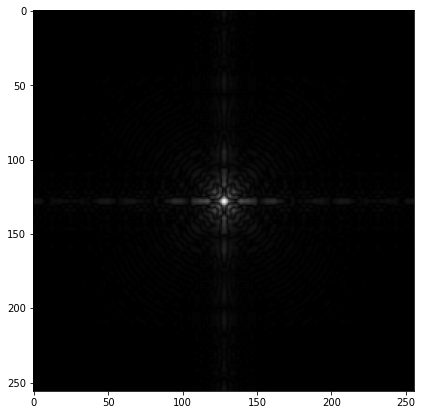

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(grayscale_img, origin='upper', cmap='gray')

As we can observe in the image above, a Fourier spectrum with intensity values ranging from $0$ to $1.5\times10^6$ has been scaled linearly to be displayed as an 8-bit gray-scale image. As a result, the brightest pixels dominate the display, at the expense of lower values of the spectrum, as can be seen in the small non-black center of the image. After applying the log transformation with $c = 1$, we get a manageable pixel intensity range of $0$ to $6.2$. Now, if we linearly normalize it to 8-bit range of $0$ to $255$, we can observe the spectrum with greater detail (see the image below).

255


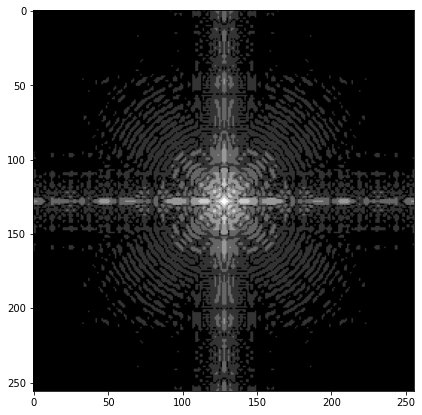

In [ ]:
log_transformed_grayscale_image = log_transformation(grayscale_img, c=1)
fig = plt.figure(figsize=(10, 7))
plt.imshow(log_transformed_grayscale_image, origin='upper', cmap='gray')

# Power-law Transformation
The basic form of the power-law transformation, which is also known as the gamma transformation, is,
	$$s = cr^\gamma $$
where, $c$ and $\gamma$ are positive constants.

In [ ]:
def power_law_transformation(image, c, gamma):
    r = np.array(image, dtype='uint16')
    s = c * (r**gamma)
    # transformed_image = Image.fromarray(np.uint8(s))
    transformed_image = normalization(s)
    return transformed_image

For fractional values of $\gamma$, this transformation works the same as the log transformation. That is, it maps a narrow range of dark input values into a wider range of output values and vice versa. For $\gamma > 1$, the opposite holds true. Let's try this transformation out on an MRI image of a fractured human spine.

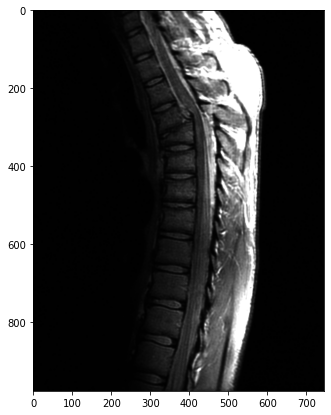

In [ ]:
grayscale_img2 = Image.open('/content/drive/MyDrive/MRI_of_Fractured_Human_Spine.tif')
fig = plt.figure(figsize=(10, 7))
plt.imshow(grayscale_img2, origin='upper', cmap='gray')

The results of applying the transformation with $c=1$ and $\gamma = 0.6, 0.4$ and $0.3$ respectively look something like,

(-0.5, 745.5, 975.5, -0.5)

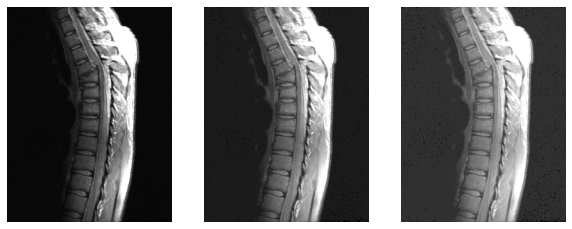

In [ ]:
power_law_transformed_grayscale_image1 = power_law_transformation(grayscale_img2, c=1, gamma=0.6)
power_law_transformed_grayscale_image2 = power_law_transformation(grayscale_img2, c=1, gamma=0.4)
power_law_transformed_grayscale_image3 = power_law_transformation(grayscale_img2, c=1, gamma=0.3)

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 3, 1)
plt.imshow(power_law_transformed_grayscale_image1, origin='upper', cmap='gray')
plt.axis('off')

fig.add_subplot(1, 3, 2)
plt.imshow(power_law_transformed_grayscale_image2, origin='upper', cmap='gray')
plt.axis('off')

fig.add_subplot(1, 3, 3)
plt.imshow(power_law_transformed_grayscale_image3, origin='upper', cmap='gray')
plt.axis('off')

As we can observe from the image above, initially, the image is predominantly dark. We can apply the power-law transformation with $\gamma < 1$ to expand the intensity levels. This results in a more detailed portrayal of the MRI scan. But, for $\gamma=0.3$, we can see that the image starts to assume a *washed-out* appearance.

**Which function is suitable for which type of images?**

Let's take a look at the curves of some basic intensity transformation functions.

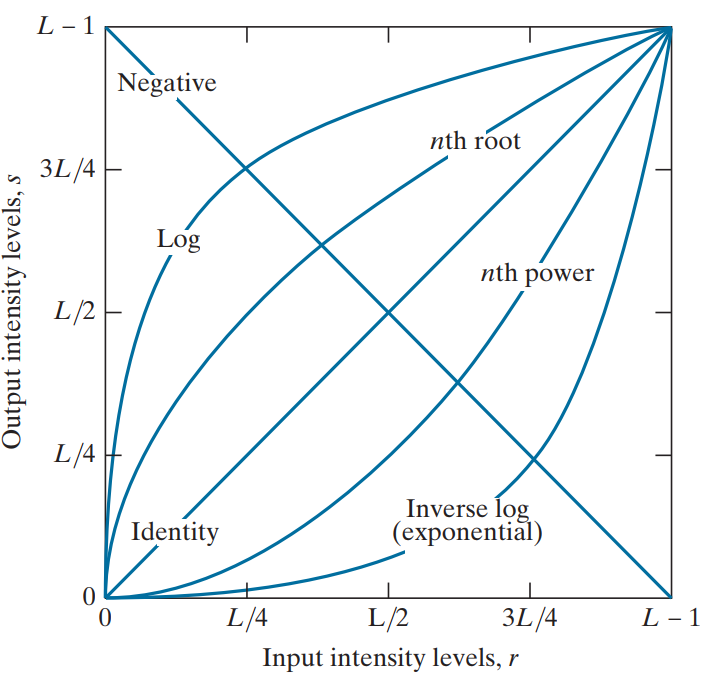

The log curve shape in figure above indicates that this transformation maps a narrow range of low intensity values in the input into a wider range of output levels. It compresses the dynamic range of images with large variations in pixel values. It is therefore, more suitable for images with dark or low intensity pixels because it can whiten them to a considerable degree and bring out a more detailed appearance. Now, let's take a look at the curves for the Power-law Transformation.

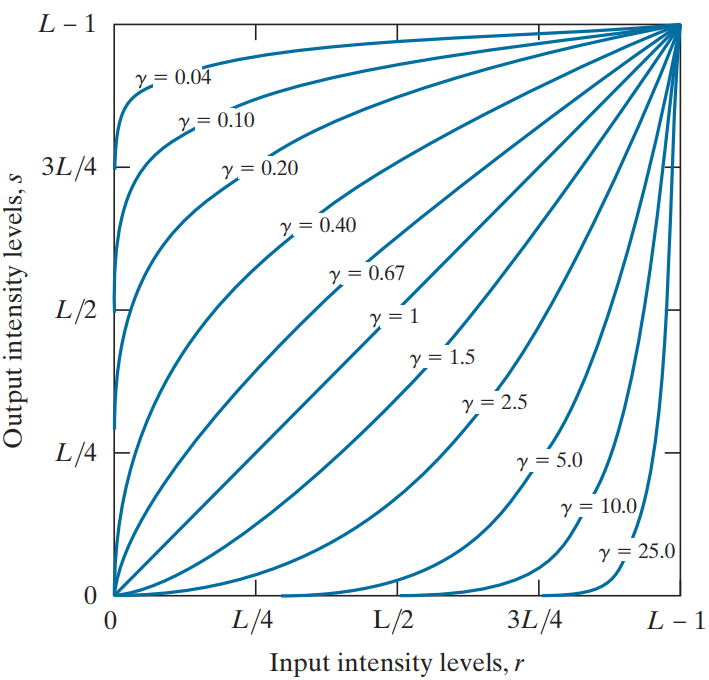

As we can observe from the figure above, a variety of transformation curves can be obtained from the Power-law equation, simply by setting different values for $\gamma$. For values of $\gamma<1$, we can see a transformation curve similar to that of the log transformation curve. So, we can say that, the power-law transformation is suitable for all types of images. It can whiten images that are dark (for $\gamma<1$) and contrarily darken images that are whitened (for $\gamma>1$). Generally, the power-law transformation comes in handy for a phenomenon called *gamma-correction*. This process is used to *gamma-correct* an image to make it suitable for display in monitors of different gamma ($\gamma$) values.

**Why is intensity scaling required before display?**

Suppose, we are log transforming an image with dark pixel intensity range of $0$ to $73$. After applying the transformation function with $c=1$, we end up with a pixel intensity range of $0$ to $6.2$. Now, to bring out the proper details from this image we need to scale it up to a range of $0$ to $255$ (for 8-bit gray-scale images). We can use the Min-Max Normalization technique for this.
$$x' = \frac{x-x_{min}}{x_{max}-x_{min}} \times range$$
where, $range = 255$ for 8-bit gray-scale images.

Again, in the case of power-law transformation, we may end up with intensity values exceeding $255$. So, in a similar manner, we need to scale the values down so that they fit within a range of $0$ to $255$. We can also observe the fact that, the significance of the value of $c$ becomes nullified when we normalize the intensity values of the output image.

# Task 2
Implement Global Histogram Equalization on gray-scale images.

* Why repeated application of HE doesn't produce any further improvements on output images?

# Global Histogram Equalization
Histogram equalization is yet another technique in the domain of image enhancement. The discrete form of this transformation is,
$$s_k = T(r_k) = \frac{(L-1)}{M \times N}\sum_{j=0}^{k}n_{r_j}\qquad k=0, 1, 2, \dots, L-1$$
where, $L$ is the number of possible intensity levels, $M$ is the number of rows, $N$ is the number of columns and $n_{r_j}$ is the number of pixels with intensity value $r_j$.

In [ ]:
def get_frequency_map(image):
    intensity_matrix = np.array(image)
    color, frequency = np.unique(intensity_matrix, return_counts=True)
    histogram = np.full(256, 0, 'uint64')
    histogram[color] = frequency
    return histogram

In [ ]:
def global_histogram_equalization(image):
    frequency_map = get_frequency_map(image)
    pSum = np.cumsum(frequency_map)
    total_pixels = np.sum(frequency_map)
    cdf = pSum/total_pixels
    scaled_image = np.round(255 * cdf).astype('uint8')
    ret_image_matrix = scaled_image[image]
    # ret_image = Image.fromarray(np.uint8(ret_image_martix))
    return ret_image_matrix

Let's perform global histogram equalization on 4 different versions of the same image. The 4 types are: dark, light, low contrast and high contrast.

(-0.5, 499.5, 499.5, -0.5)

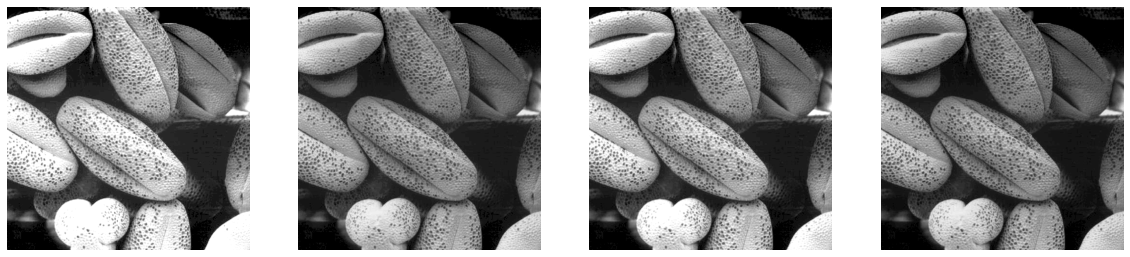

In [ ]:
img1 = Image.open('/content/drive/MyDrive/DIP3E_Original_Images_CH03/Fig0316(1)(top_left).tif')
img2 = Image.open('/content/drive/MyDrive/DIP3E_Original_Images_CH03/Fig0316(2)(2nd_from_top).tif')
img3 = Image.open('/content/drive/MyDrive/DIP3E_Original_Images_CH03/Fig0316(3)(third_from_top).tif')
img4 = Image.open('/content/drive/MyDrive/DIP3E_Original_Images_CH03/Fig0316(4)(bottom_left).tif')

fig = plt.figure(figsize=(20, 7))
fig.add_subplot(1, 4, 1)
plt.imshow(img1, origin='upper', cmap='gray')
plt.axis('off')

fig.add_subplot(1, 4, 2)
plt.imshow(img2, origin='upper', cmap='gray')
plt.axis('off')

fig.add_subplot(1, 4, 3)
plt.imshow(img3, origin='upper', cmap='gray')
plt.axis('off')

fig.add_subplot(1, 4, 4)
plt.imshow(img4, origin='upper', cmap='gray')
plt.axis('off')

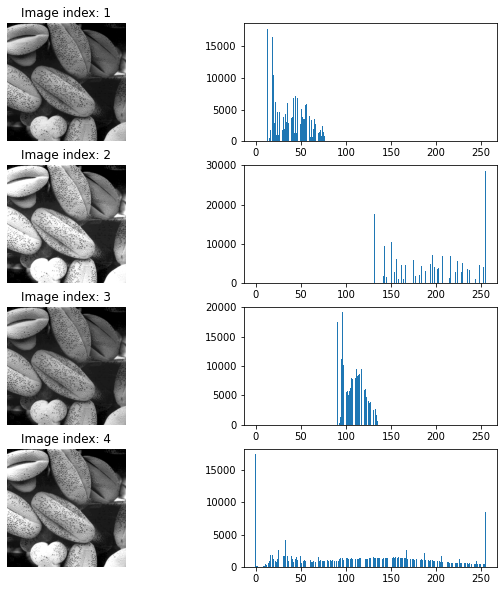

In [ ]:
chosen_images = [img4, img1, img2, img3]
fig = plt.figure(figsize = (10,10))
idx = 1
for img in chosen_images:
  fig.add_subplot(len(chosen_images),2,idx)
  plt.imshow(img, cmap ='gray')
  plt.axis('off')
  plt.title('Image index: '+str(idx//2+1))
  fig.add_subplot(len(chosen_images),2,idx+1)
  plt.bar(range(0,256),get_frequency_map(img))
  idx+=2

After applying global histogram equalization on these images, we end up with intensity distribution histograms that look like,

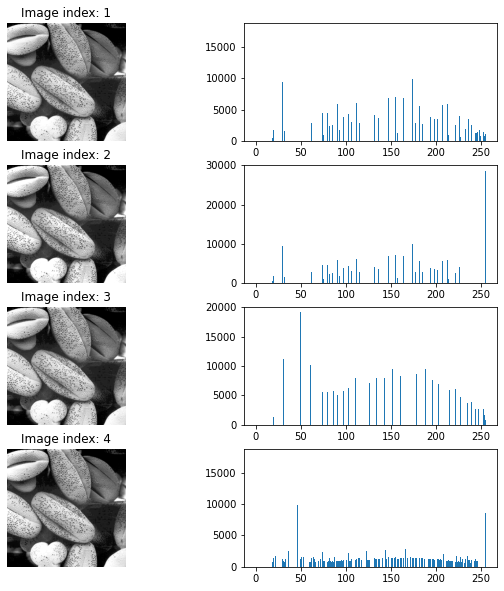

In [ ]:
chosen_images = [img4, img1, img2, img3]
fig = plt.figure(figsize = (10,10))
idx = 1
for img in chosen_images:
    global_equalized_img = global_histogram_equalization(img)
    fig.add_subplot(len(chosen_images),2,idx)
    plt.imshow(global_equalized_img, cmap ='gray')
    plt.axis('off')
    plt.title('Image index: '+str(idx//2+1))
    fig.add_subplot(len(chosen_images),2,idx+1)
    plt.bar(range(0,256),get_frequency_map(global_equalized_img))
    idx+=2

The first 3 images show significant improvement in terms of details and perceptibility. The $4^{th}$ image didn't change much as its intensity distribution was already spread out in the span of the full intensity scale.

**Why repeated application of HE doesn't produce any further improvements on output images?**

From the aforementioned global histogram equalization equation, we can see that, every pixel with value $r_k$ is mapped to a value $s_k$, which means, $n_{s_k} = n_{r_k}$. If histogram equalization is applied again, it would entail something like, $$v_k = T(s_k) = \frac{(L-1)}{M \times N}\sum_{j=0}^{k}n_{s_j}\qquad k=0, 1, 2, \dots, L-1$$
But, since $n_{s_j} = n_{r_j}$,
$$v_k = T(s_k) = \frac{(L-1)}{M \times N}\sum_{j=0}^{k}n_{r_j}=s_k\qquad k=0, 1, 2, \dots, L-1$$
which indicates that a second pass of this transformation would yield the same image as the first pass.

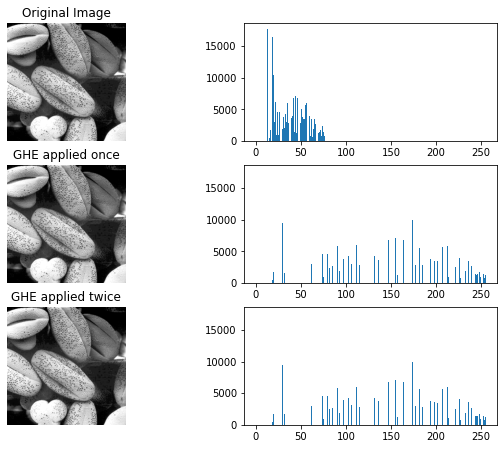

In [ ]:
g1 = global_histogram_equalization(img4)
g2 = global_histogram_equalization(g1)
images = [img4, g1, g2]
titles = ['Original Image','GHE applied once','GHE applied twice']
fig = plt.figure(figsize = (10,10))
idx = 1
for img in images:
    fig.add_subplot(len(chosen_images),2,idx)
    plt.imshow(global_equalized_img, cmap ='gray')
    plt.axis('off')
    plt.title(titles[idx//2])
    fig.add_subplot(len(chosen_images),2,idx+1)
    plt.bar(range(0,256),get_frequency_map(img))
    idx+=2

We can clearly observe that, the intensity distribution remains unchanged when GHE is applied more than once.

# Task 3

Implement Local Histogram Equalization (LHE) on gray scale images. 
* Why do you have annoying side effects at the boundary of local image regions.

# Local Histogram Equalization

Local Histogram Equalization is the same as Global Histogram Equalization, which is applied within a specified neighborhood/locale of the image.

In [ ]:
def local_histogram_equalization(image, neighborhood):
    image_matrix = np.array(image)
    rows, cols = np.shape(image_matrix)#image.size
    dx, dy = neighborhood
    for i in range(0, rows, dx):
        for j in range(0, cols, dy):
            # window = Image.fromarray(np.uint8(image_matrix[i:np.min(i+dx, rows), j: np.min(j+dy, cols)]))
            image_matrix[i:min(i+dx, rows), j: min(j+dy, cols)] = global_histogram_equalization(Image.fromarray(np.uint8(image_matrix[i:min(i+dx, rows), j: min(j+dy, cols)])))#np.array(global_histogram_equalization(window))
    equalized_image = Image.fromarray(np.uint8(image_matrix))
    return equalized_image


Let's apply this transformation on an image in which the intricate details are barely visible. Then, we can understand how local histogram equalization can come in handy. The image shown below has some hidden symbols amidst the black squares, which are of course, not even slightly visible.

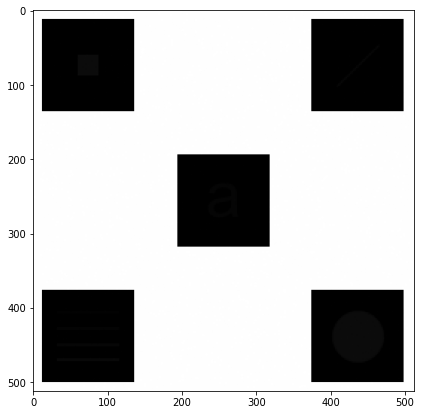

In [ ]:
img123 = Image.open('/content/drive/MyDrive/DIP3E_Original_Images_CH03/Fig0326(a)(embedded_square_noisy_512).tif')
fig = plt.figure(figsize=(10, 7))
plt.imshow(img123, origin='upper', cmap='gray')

In [ ]:
local_equalized_img123 = local_histogram_equalization(img123, (3, 3))

In [ ]:
print(img123.size)

(512, 512)


After applying local histogram equalization with a $3 \times 3$ neighborhood, we obtain an image that looks something like,

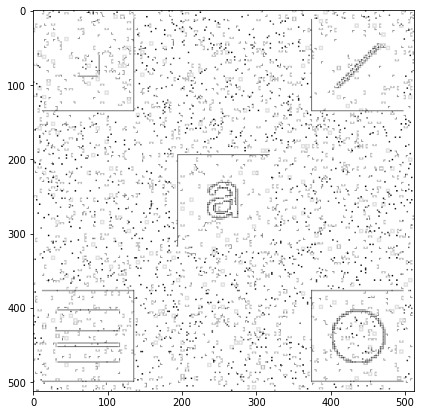

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(local_equalized_img123, origin='upper', cmap='gray')

Now, we can clearly see significant details that were contained within the black squares.

**Why do you have annoying side effects at the boundary of local image regions?**

Let's apply local histogram equalization on an image with varying intensity distributions and see what happens.

Here, we can clearly see a block-like inconsistency in the locally equalized images. This happens due to dissimilar variances of intensity distributions of the pixels situated within the visible blocks. The local means and variances of the pixels within these blocks result in differently equalized corresponding histograms. Consequently, we can observe a visual side-effect where it appears as if the image has been partitioned into square blocks.

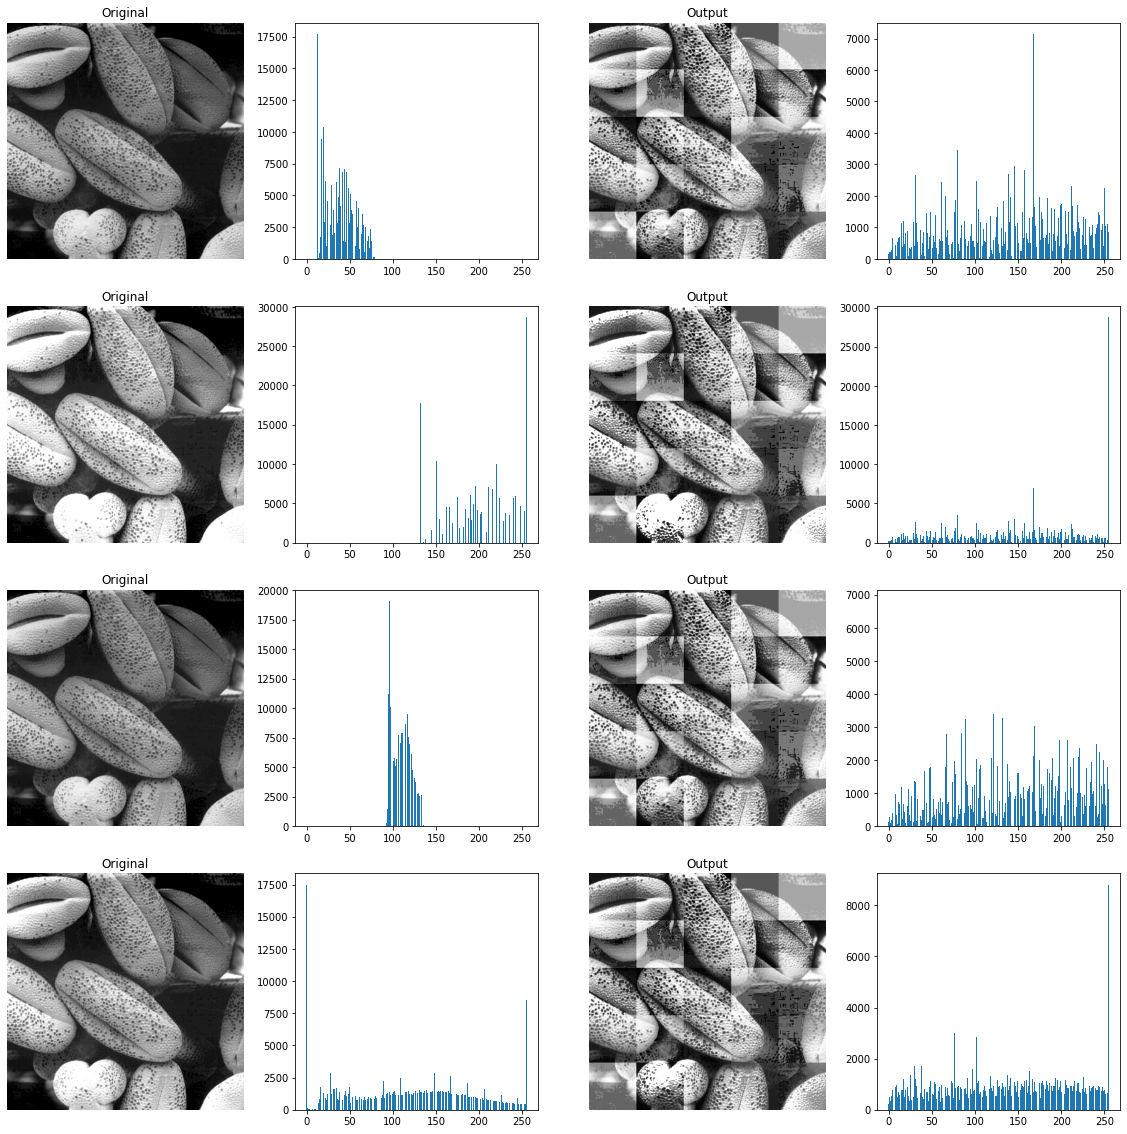

In [ ]:
fig = plt.figure(figsize = (20,20))
idx = 1
for img in chosen_images:
  fig.add_subplot(len(chosen_images),4,idx)
  plt.imshow(img, cmap ='gray')
  plt.axis('off')
  plt.title('Original')
  fig.add_subplot(len(chosen_images),4,idx+1)
  plt.bar(range(0,256),get_frequency_map(img))
  fig.add_subplot(len(chosen_images),4,idx+2)
  img = local_histogram_equalization(img,(100,100))
  plt.imshow(img,cmap= 'gray')
  plt.axis('off')
  plt.title('Output')
  fig.add_subplot(len(chosen_images),4,idx+3)
  plt.bar(range(0,256),get_frequency_map(img))
  idx+=4